# Prediction of credit card approval
* url: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/

# Import all libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

# Data path

In [2]:
main_path = "/home/andres/Proyectos/Python/Machine Learning/Credit card approval"
credit_file = "credit_record.csv"
application_file = "application_record.csv"
credit_path = os.path.join(main_path, credit_file)
application_path = os.path.join(main_path, application_file)

#### Columns in the application_record.csv
* ID: 	Client number 	
* CODE_GENDER: 	Gender 	
* FLAG_OWN_CAR: 	Is there a car 	
* FLAG_OWN_REALTY: 	Is there a property 	
* CNT_CHILDREN: 	Number of children 	
* AMT_INCOME_TOTAL: 	Annual income 	
* NAME_INCOME_TYPE: 	Income category 	
* NAME_EDUCATION_TYPE: 	Education level 	
* NAME_FAMILY_STATUS: 	Marital status 	
* NAME_HOUSING_TYPE: 	Way of living 	
* DAYS_BIRTH: 	Birthday 	Count backwards from current day (0), -1 means yesterday
* DAYS_EMPLOYED: 	Start date of employment 	Count backwards from current day(0). If positive, it means the person currently unemployed.
* FLAG_MOBIL: 	Is there a mobile phone 	
* FLAG_WORK_PHONE: 	Is there a work phone 	
* FLAG_PHONE: 	Is there a phone 	
* FLAG_EMAIL: 	Is there an email 	
* OCCUPATION_TYPE: 	Occupation 	
* CNT_FAM_MEMBERS: 	Family size

#### Coluns in the credit_record.csv
* ID: 	Client number 	
* MONTHS_BALANCE: 	Record month 	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* STATUS: 	Status 	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Data exploration

In [3]:
credit_data = pd.read_csv(credit_path)
credit_data.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [4]:
application_data = pd.read_csv(application_path)
application_data.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [5]:
print(credit_data.shape)
print(application_data.shape)

(1048575, 3)
(438557, 18)


Because the credit_record.csv has duplicate records, it has more total records. For now we are going to work only with the application_record.csv file. We are going to check for duplicate records and variables types.

In [6]:
print(application_data.duplicated(subset = "ID").sum())
application_data = application_data.drop_duplicates(subset = "ID")
print(application_data.duplicated(subset = "ID").sum())

47
0


In [7]:
application_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

We are going to change the columns FLAG_OWN_CAR and FLAG_OWN_REALTY to integer, like the rest of the binary variables.

In [8]:
application_data["FLAG_OWN_CAR"] = application_data["FLAG_OWN_CAR"].replace({'Y':1, 'N':0})
application_data["FLAG_OWN_REALTY"] = application_data["FLAG_OWN_REALTY"].replace({'Y':1, 'N':0})
application_data.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [9]:
application_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

Now we are going to see the unique values for each object type column.

In [10]:
application_data['NAME_INCOME_TYPE'].unique().tolist()

['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Student']

In [11]:
application_data['NAME_EDUCATION_TYPE'].unique().tolist()

['Higher education',
 'Secondary / secondary special',
 'Incomplete higher',
 'Lower secondary',
 'Academic degree']

In [12]:
application_data['NAME_FAMILY_STATUS'].unique().tolist()

['Civil marriage', 'Married', 'Single / not married', 'Separated', 'Widow']

In [13]:
application_data['NAME_HOUSING_TYPE'].unique().tolist()

['Rented apartment',
 'House / apartment',
 'Municipal apartment',
 'With parents',
 'Co-op apartment',
 'Office apartment']

In [14]:
application_data['OCCUPATION_TYPE'].unique().tolist()

[nan,
 'Security staff',
 'Sales staff',
 'Accountants',
 'Laborers',
 'Managers',
 'Drivers',
 'Core staff',
 'High skill tech staff',
 'Cleaning staff',
 'Private service staff',
 'Cooking staff',
 'Low-skill Laborers',
 'Medicine staff',
 'Secretaries',
 'Waiters/barmen staff',
 'HR staff',
 'Realty agents',
 'IT staff']

### Dummy variables

In [15]:
application_data["CODE_GENDER"] = application_data["CODE_GENDER"].replace({'M':1, 'F':0})

In [16]:
columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
for column in columns:
    dummy_variable = pd.get_dummies(application_data[column], prefix = column, dtype = int)
    application_data = pd.concat([application_data, dummy_variable], axis = 1)
    application_data = application_data.drop(column, axis = 1)
application_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5008805,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,0
2,5008806,1,1,1,0,112500.0,-21474,-1134,1,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,0,1,0,0,0


In order to train our model with need to classify the customers in two categories:
- Good customer: A customer that always paid his credit card.
- Bad customer: A customer that has one or more dues.
We are also going to prioritize the most recent data, for example, if a customer had more than one month of due in the past but in the last six months he paid on time his credit card, then is consider a good customer.
If a customer has not use his credit card for three consecutive months then we will take him out of the model.
For the credit history to be relevant, we will consider only customers with more or equal than six months of use.

In [17]:
counter_data = pd.DataFrame()
counter_data['ID'] = credit_data['ID']
counter_data['Months'] = credit_data.groupby('ID')['ID'].transform('count')
counter_data = counter_data.drop_duplicates(subset = 'ID')
more_six = (counter_data['Months'] >= 6).sum()
less_six = (counter_data['Months'] < 6).sum()
total_customers = more_six + less_six

In [18]:
def histogram(categories, values, colors, y_label, title, total_customers):
    # Create a histogram:
    fig, ax = plt.subplots()
    categories = categories
    values = values
    colors = colors
    ax.bar(categories, values, color = colors)

    # Add percentage to each bar:
    for i, value in enumerate(values):
        percentage = (value / total_customers) * 100
        ax.text(i, value / 2, f"{percentage:.2f}%", ha = 'center')

    # Add labels and colors:
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_ylim(0, max(values) + 1)

    # Mostrar el histograma
    plt.show()

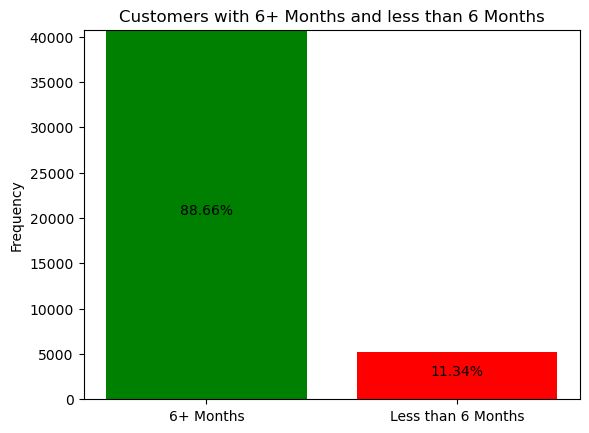

In [19]:
categories = ['6+ Months', 'Less than 6 Months']
values = [more_six, less_six]
colors = ['green', 'red']
y_label = 'Frequency'
title = 'Customers with 6+ Months and less than 6 Months'
histogram(categories, values, colors, y_label, title, total_customers)

We can see that the vast majority of customers meet the 6+ months of credit history condition in order to be considered as relevant, for the ones that not meet the condition we are going to drop them from the model.

In [20]:
counter_data = counter_data[counter_data['Months'] >= 6]
counter_data.head(20)
total_customers = len(counter_data)

In [21]:
credit_data = pd.merge(credit_data, counter_data[['ID']], on = 'ID')
credit_data.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001712,0,C
1,5001712,-1,C
2,5001712,-2,C
3,5001712,-3,C
4,5001712,-4,C
5,5001712,-5,C
6,5001712,-6,C
7,5001712,-7,C
8,5001712,-8,C
9,5001712,-9,0


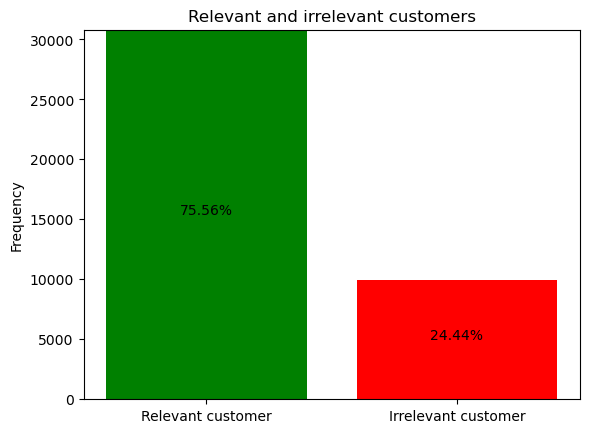

In [22]:
# Check unuse of credit card for three consecutive months:
def counter(column):
    return column.str.count('X').rolling(3, min_periods = 1).sum().eq(3).any()
irrelevant_customers_data = credit_data.groupby('ID')['STATUS'].apply(counter).reset_index()
irrelevant_customers = irrelevant_customers_data['STATUS'].sum()
relevant_customers = total_customers - irrelevant_customers

categories = ['Relevant customer', 'Irrelevant customer']
values = [relevant_customers, irrelevant_customers]
colors = ['green', 'red']
y_label = 'Frequency'
title = 'Relevant and irrelevant customers'
histogram(categories, values, colors, y_label, title, total_customers)

We can see roughly about 75% of customers are relevant (they used their credit card at least once in the last three months). We are going to stick only with them for the model.

In [23]:
irrelevant_customers_data = irrelevant_customers_data[irrelevant_customers_data['STATUS'] == False]
irrelevant_customers_data.head(20)

,ID,STATUS
0,5001712,False
4,5001717,False
6,5001719,False
7,5001720,False
10,5001725,False
11,5001726,False
12,5001729,False
13,5001730,False
17,5001735,False
18,5001736,False


In [24]:
credit_data = pd.merge(credit_data, irrelevant_customers_data[['ID']], on = 'ID')
credit_data.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001712,0,C
1,5001712,-1,C
2,5001712,-2,C
3,5001712,-3,C
4,5001712,-4,C
5,5001712,-5,C
6,5001712,-6,C
7,5001712,-7,C
8,5001712,-8,C
9,5001712,-9,0


In [25]:
# We create a new data frame:
classification_data = pd.DataFrame()
classification_data['ID'] = credit_data['ID'] # Add the ID.
six_months_recent = credit_data['MONTHS_BALANCE'] >= -5 # Filter for the six most recents recorrds.
numeric_statuses = credit_data['STATUS'].loc[credit_data['STATUS'].astype(str).str.isdigit()] # keep numeric records.
is_bad_customer = numeric_statuses.astype(int).between(0, 5) # Filter for bad customers.
# Create the Good_customer column:
classification_data['Good_customer'] = 1
classification_data.loc[six_months_recent & is_bad_customer, 'Good_customer'] = 0
classification_data.drop_duplicates(subset=['ID'], inplace = True)
good_customers = classification_data['Good_customer'].sum()
bad_customers = len(classification_data) - good_customers
classification_data.head(20)

,ID,Good_customer
0,5001712,1
19,5001717,1
41,5001719,1
84,5001720,0
120,5001725,0
128,5001726,1
167,5001729,1
174,5001730,1
235,5001735,1
259,5001736,1


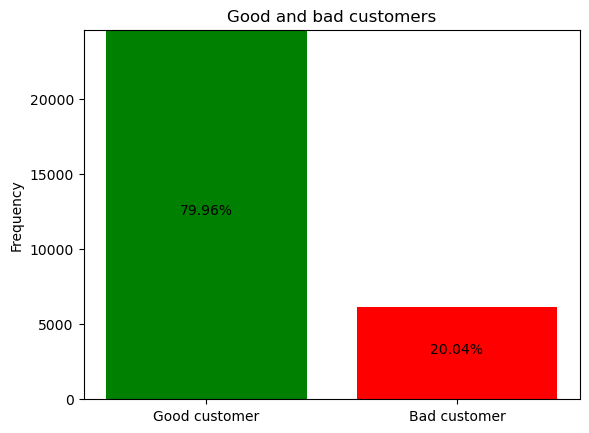

In [26]:
categories = ['Good customer', 'Bad customer']
values = [good_customers, bad_customers]
colors = ['green', 'red']
y_label = 'Frequency'
title = 'Good and bad customers'
total_customers = len(classification_data)
histogram(categories, values, colors, y_label, title, total_customers)

In [27]:
# Perform an inner join:
application_data = pd.merge(application_data, classification_data[['ID', 'Good_customer']], on = 'ID', how = 'inner')
application_data.head(15)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,Good_customer
0,5008804,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,-12005,-4542,1,1,...,0,0,0,0,0,0,0,0,0,1
2,5008810,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,1,0,0,0,1
3,5008811,0,0,1,0,270000.0,-19110,-3051,1,0,...,0,0,0,0,0,1,0,0,0,1
4,5008812,0,0,1,0,283500.0,-22464,365243,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5008813,0,0,1,0,283500.0,-22464,365243,1,0,...,0,0,0,0,0,0,0,0,0,0
6,5008814,0,0,1,0,283500.0,-22464,365243,1,0,...,0,0,0,0,0,0,0,0,0,0
7,5008815,1,1,1,0,270000.0,-16872,-769,1,1,...,0,0,0,0,0,0,0,0,0,0
8,5008821,1,1,1,0,135000.0,-17778,-1194,1,0,...,0,0,0,0,0,0,0,0,0,1
9,5008825,0,1,0,0,130500.0,-10669,-1103,1,0,...,0,0,0,0,0,0,0,0,0,0


### NaN values

In [28]:
nans = application_data.isna().sum()
nans

ID                                                   0
CODE_GENDER                                          0
FLAG_OWN_CAR                                         0
FLAG_OWN_REALTY                                      0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
FLAG_MOBIL                                           0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCA

In [29]:
# Choose the predictors variables:
predictors = application_data.columns.tolist()
predictors.remove('ID')
predictors.remove('Good_customer')
predictors

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',


In [30]:
# Assign the variables:
X = application_data[predictors]
Y = application_data['Good_customer']

Because we have a lot of variables we are going to try to reduce de dimension by performing a PCA (Principal Component Analysis).
### PCA

In [31]:
pca = PCA()
pca.fit(X)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
component_names = [f"Principal component {i+1}" for i in range(len(explained_variance_ratio))]
explained_variance_df = pd.DataFrame({
    'Principal component': component_names,
    'Explained variance': explained_variance_ratio
})
explained_variance_df

,Principal component,Explained variance
0,Principal component 1,6.595236e-01
1,Principal component 2,3.401084e-01
2,Principal component 3,3.680237e-04
3,Principal component 4,4.197154e-11
4,Principal component 5,1.341917e-11
5,Principal component 6,1.114203e-11
6,Principal component 7,1.012713e-11
7,Principal component 8,8.980331e-12
8,Principal component 9,8.253772e-12
9,Principal component 10,7.062535e-12


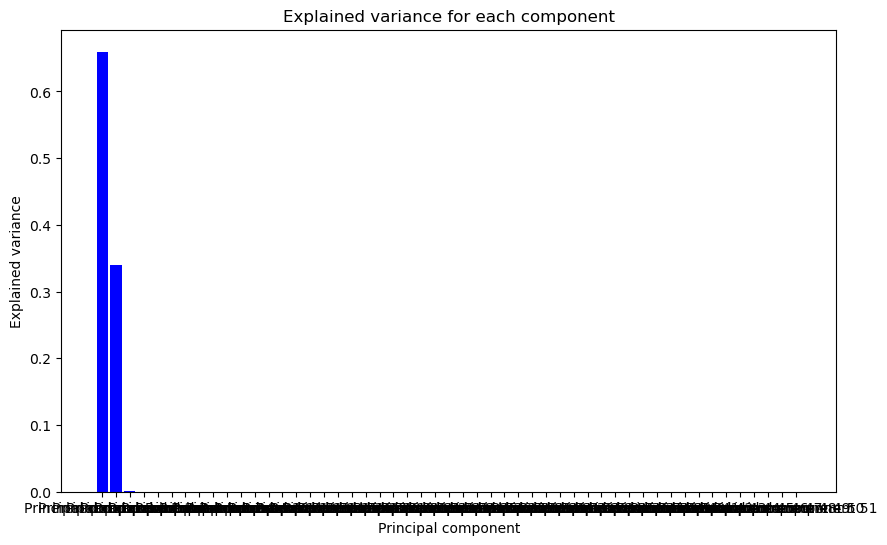

In [32]:
# Bar plot:
plt.figure(figsize = (10, 6))
plt.bar(explained_variance_df['Principal component'], explained_variance_df['Explained variance'], color = 'blue')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Explained variance for each component')
plt.show()

We can see that only two components are relevant for the analysis, therefore we are going to transform the data set to use those two components.

# Logistic Regression

In [33]:
# Adjust the model PCA:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

# Split the set between train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size = 0.2, random_state = 42)

In [34]:
# Create the model:
model = LogisticRegression(class_weight = 'balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

In [35]:
# Make the predictions:
Y_pred = model.predict(X_test)

Now we check the model performance.

In [36]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5780228758169934


In [37]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 381  556]
 [1510 2449]]


In [38]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.41      0.27       937
           1       0.81      0.62      0.70      3959

    accuracy                           0.58      4896
   macro avg       0.51      0.51      0.49      4896
weighted avg       0.70      0.58      0.62      4896



From the above metrics we can concluded thar our model is not the best to identify true positives but is decent enough to identify true negatives, meaning that if we stick with this model, we should only trust it when it predicts that a customer is going to be a good payer but ignore it if it predicts otherwise.
We are going to build another model oversampling, we do this because the bad customers set is smaller than the sgood customer set.

In [39]:
# Oversample the data:
oversampler = RandomOverSampler(random_state = 42)
X_resampled, Y_resampled = oversampler.fit_resample(X_pca, Y)

# Split the set between train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)

# Create the model:
model = LogisticRegression(class_weight = 'balanced')
model.fit(X_train, Y_train)

# Make the predictions:
Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

In [40]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.5159949622166247


In [41]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[1759 2176]
 [1667 2338]]


In [42]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48      3935
           1       0.52      0.58      0.55      4005

    accuracy                           0.52      7940
   macro avg       0.52      0.52      0.51      7940
weighted avg       0.52      0.52      0.51      7940



We can observe that the metrics for the bad customers improve in detriment of the good customers metrics.